In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPRegressor
import scipy.stats as stats

%matplotlib inline

In [ ]:
# the data is from the UCI Machine Learning Repository: 
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG. 

In [ ]:
# the data set of car model attributes for 398 cars built from 1970 to 1982. 
# mpg, cylinders, displacement, horsepower, weight, acceleration, model year, carname.

In [ ]:
# Exploring the DATA :

In [7]:
file_path = os.path.join(os.getcwd(), 'auto-mpg.csv')

auto_mpg = pd.read_csv(file_path, sep='\t', index_col=0)
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,accelartion,model year,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino


In [9]:
auto_mpg.describe()

,mpg,cylinders,displacement,weight,accelartion,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [11]:
# To identify the column type that is 'object'
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accelartion   398 non-null    float64
 6   model year    398 non-null    int64  
 7   carname       398 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 28.0+ KB


In [12]:
# to print out the values that can NOT be converted to a float. 
auto_mpg['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# In order to Remove The Rows With The Bad Data Value:
# There are many ways to deal with missing values:

# Replace missing values with mean values.
# Build a model to forecast the missing values.
# Interpolate the value from surrounding values (this can be good for timeseries data)
# Just remove the rows with the missing values.

In [15]:
# In order to keep the rows where "horsepower" does not equal ?.

auto_mpg = auto_mpg.loc[auto_mpg['horsepower']!='?', :]
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(float)
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   accelartion   392 non-null    float64
 6   model year    392 non-null    int64  
 7   carname       392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 27.6+ KB


In [16]:
# In order to remove the features that do not help the model building
auto_mpg.drop('carname', axis=1, inplace=True)
# inplace=True : we update the dataframe inplace.

In [ ]:
# EXPLORING the DATA : HISTOGRAMS

/tmp/ipykernel_103682/3797608037.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  auto_mpg.hist(ax=ax1)
/tmp/ipykernel_103682/3797608037.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = auto_mpg.hist(ax=ax1)  # using "_" in order to remove the messages


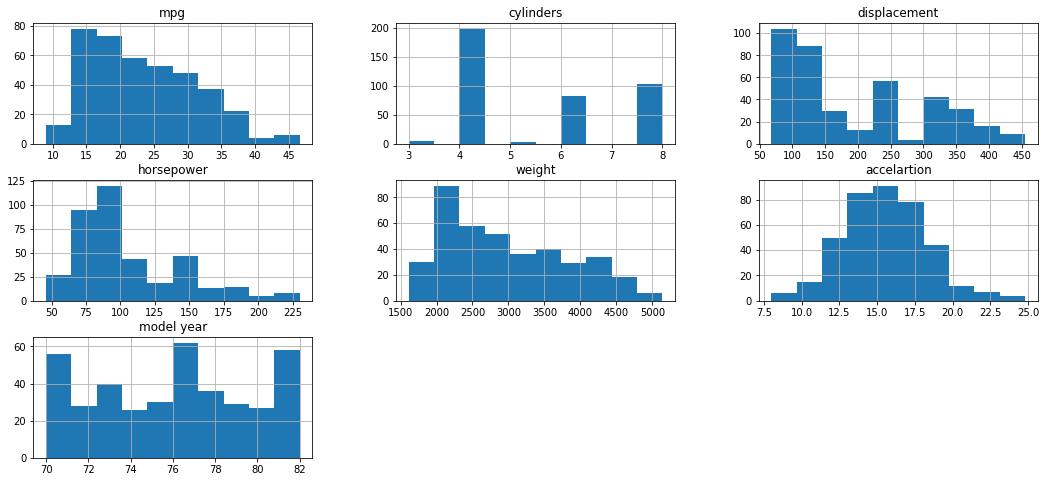

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 8))

auto_mpg.hist(ax=ax1)
_ = auto_mpg.hist(ax=ax1)  # using "_" in order to remove the messages

In [19]:
# EXPLORING the DATA : SCATTER MATRICES

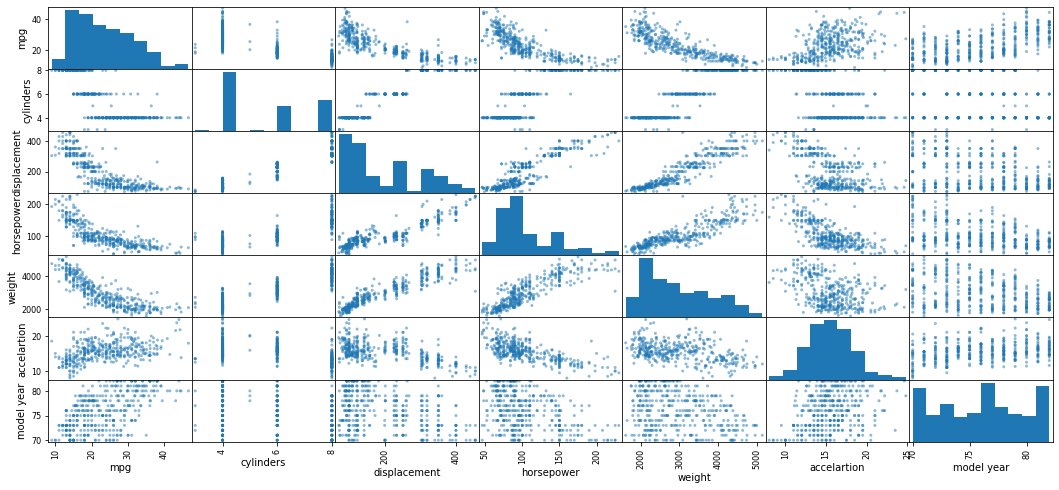

In [20]:
_ = scatter_matrix(auto_mpg, figsize=(18,8))

In [ ]:
# EXPLORING the DATA : CORRELATION MATRICES

In [21]:
auto_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,accelartion,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
accelartion,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

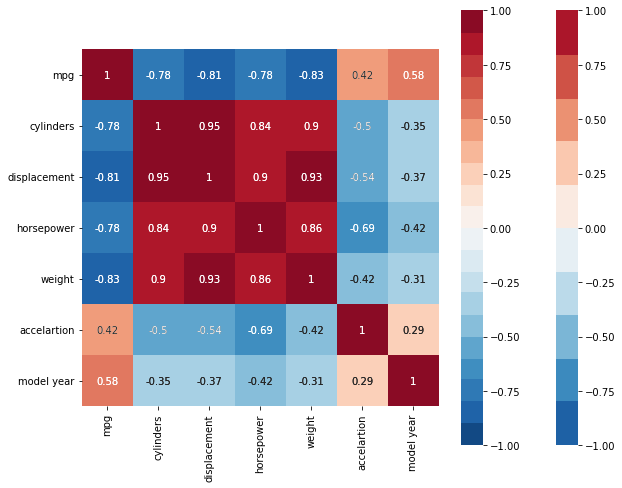

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

### using seaborn library as sns

sns.heatmap(auto_mpg.corr(), 
            square=True, 
            ax=ax, annot=True,
            cmap=sns.color_palette("RdBu_r", 10), 
            center=0, vmin=-1, vmax=1)

### adjusting the scale

sns.heatmap(auto_mpg.corr(), 
            square=True, 
            ax=ax, 
            annot=True,
            cmap=sns.color_palette("RdBu_r", 20), center=0, vmin=-1, vmax=1)

In [ ]:
# PREPARING the DATA

In [23]:
auto_train, auto_test = train_test_split(auto_mpg, test_size=0.2, random_state=0)

# separate our training data into predictors and predictand
xCols = [col for col in auto_train.columns if col not in ['mpg']]
X_train = auto_train[xCols]
y_train = auto_train['mpg']

# separate our testing data into predictors and predictand
X_test = auto_test[xCols]
y_test = auto_test['mpg']

# Mean Standardize the data
X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_train.mean())/X_train.std()

y_train_std = (y_train - y_train.mean())/y_train.std()
y_test_std = (y_test - y_train.mean())/y_train.std()

In [ ]:
# BUILDING the MODEL

In [ ]:
# LinearRegression() - 

# Lasso() - a linear regression with L1 (aka lasso) regularization. 
# It is the same regularization we used with logistic regression. 

# LassoCV() - a linear regression with L1 regularization, that is optimized in a CV loop. 
# it is very similar to LogisticRegressionCV
# (we should use cross validation to set the proper regularization constant)

In [24]:
linReg = LassoCV(cv=5, n_alphas=100)

# n_alphas is a regularization parameter (instead of calling it C)
# it determines the MSE for every value of ALPHA
# as ALPHA increases, the REGULARIZATION gets stronger 

linReg.fit(X_train_std, y_train_std)
print("Optimal_Alpha: {:.6f}".format(linReg.alpha_))

Optimal_Alpha: 0.007757


In [26]:
# VISUALIZE MSE vs. REGULARIZATION

(0.175, 0.25)

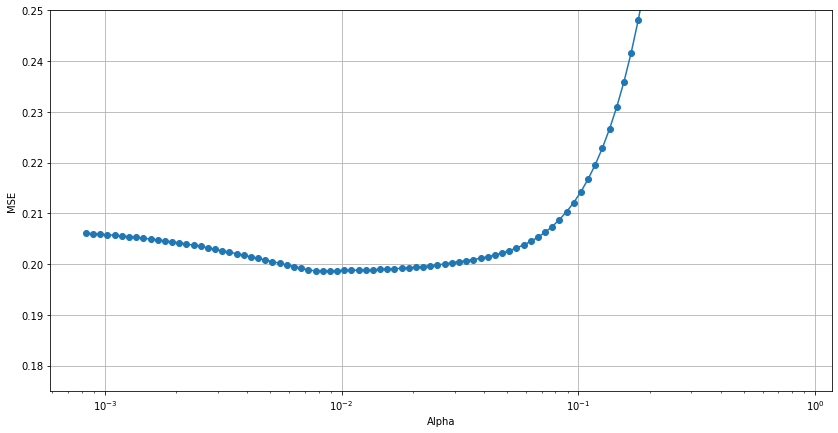

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(linReg.alphas_, linReg.mse_path_.mean(axis=1), marker='o')
axs.set_xscale('log')
axs.set_title('')
axs.set_xlabel('Alpha')
axs.set_ylabel('MSE')
axs.grid()

axs.set_ylim(0.175,0.25)

In [ ]:
# PRINTING the COEFFICIENTS that are NON-ZERO

In [28]:
for pred, coef in zip(X_train.columns, linReg.coef_):
    if coef != 0:
        print('{}: {:.4f}'.format(pred, coef))

cylinders: -0.0016
weight: -0.7063
accelartion: 0.0325
model year: 0.3386


In [ ]:
# RUNNING THE MODEL on the TEST DATA and TO And COMPUTE The Mean Square Error

In [29]:
y_pred_std = linReg.predict(X_test_std)
print('The MSE, on the standardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test_std, y_pred_std)))

y_pred = (y_pred_std * y_train.std()) + y_train.mean()
print('The MSE, on the unstandardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test, y_pred)))

The MSE, on the standardized predictions, is: 0.196
The MSE, on the unstandardized predictions, is: 11.850


In [ ]:
# R^2 SCORE of MODEL PREDICTIONS
# THE 𝑅2 SCORE measures of how well the model fits the data.

In [ ]:
# The top term in the fraction is simply the sum of square error of the model. 
# 𝑦𝑖 is the data point (in our, case the true value of mpg) and 𝑦̂  is the model forecast. 
# The bottom term in the fraction is sum of square errors if our model simply guessed 
# the mean of the data for every prediction (this is proportional to the variance of the data). 
# 𝑦¯ is the mean of the data (the mean of the true values of MPG in our test set).

In [ ]:
# Consider the case when the model is perfect and has 0 error. 
# then the top portion of the fraction will be 0, and our formula becomes: 𝑅2=1−0=1.

In [30]:
print('R^2 Score is: {:.3f}'.format((r2_score(y_test_std, y_pred_std))))

# The R^2 score will be the same for the unstadardized data : 

print('R^2 Score is: {:.3f}'.format((r2_score(y_test, y_pred))))

R^2 Score is: 0.809
R^2 Score is: 0.809


In [ ]:
# DIAGNOSTIC PLOTS

In [ ]:
# The first is simply a scatter plot of actual values vs predicted. .

In [ ]:
# The second is a plot of residuals (errors) with respect to predicted value. 

In [ ]:
# The third is a Q-Q plot which measures the distribution of the residuals against a normal distribution.

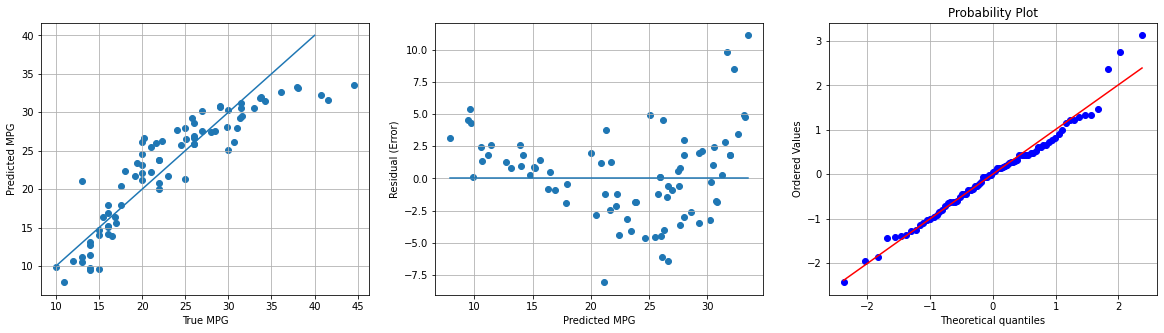

In [35]:
# The first is a scatter plot of actual values vs predicted. 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test, y_pred)
axs[0].plot([10, 40], [10, 40])
axs[0].set_xlabel('True MPG')
axs[0].set_ylabel('Predicted MPG')
axs[0].grid()

# The second is a plot of residuals (errors) with respect to predicted value. 
residuals = y_test - y_pred
axs[1].scatter(y_pred, residuals)
axs[1].plot([y_pred.min(), y_pred.max()],[0, 0])
axs[1].set_xlabel('Predicted MPG')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

# The third is a Q-Q plot which measures the distribution of the residuals against a normal distribution.
residulas_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residulas_std, dist="norm", plot=axs[2])
axs[2].grid()

In [ ]:
# BUT ...

# 1. The distribution of three of the features, and the target are right skewed. 
# 2. The residuals vs predicted plot shows a possible non-linear relationship in the data.

In [ ]:
# THEREFORE ...

# 1. We can use a non-linear model (something other than linear regression). 
# 2. We can attempt to transform our features such that the relationships 
# between the features and the target become more linear. 
# i.e. FEATURE ENGINEERING .

In [ ]:
# FEATURE TRANSFORMATION

In [ ]:
# The weight, displacement, and horsepower are all right skewed. 
# The target mpg is also right skewed.

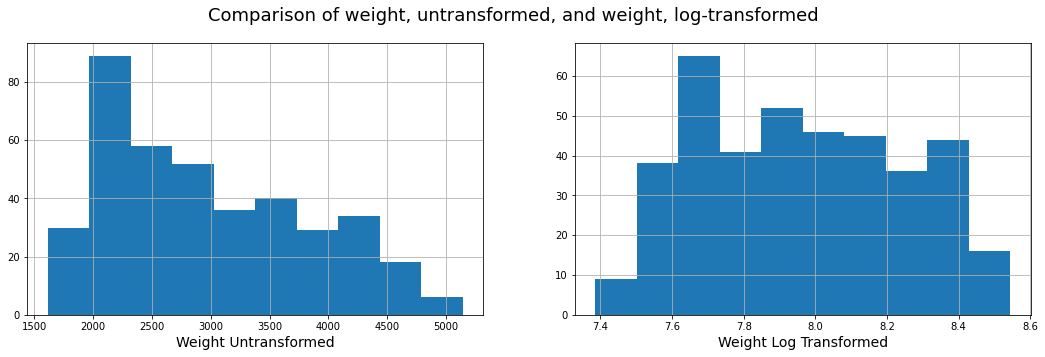

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
auto_mpg['weight'].hist(ax=axs[0])
np.log(auto_mpg['weight']).hist(ax=axs[1])
axs[0].set_xlabel('Weight Untransformed', fontsize=14)
axs[1].set_xlabel('Weight Log Transformed', fontsize=14)
_ = fig.suptitle('Comparison of weight, untransformed, and weight, '
                 'log-transformed', fontsize=18)

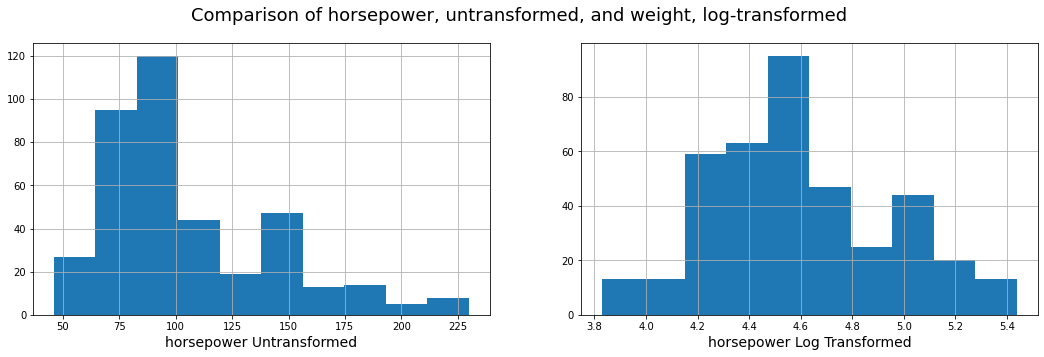

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
auto_mpg['horsepower'].hist(ax=axs[0])
np.log(auto_mpg['horsepower']).hist(ax=axs[1])
axs[0].set_xlabel('horsepower Untransformed', fontsize=14)
axs[1].set_xlabel('horsepower Log Transformed', fontsize=14)
_ = fig.suptitle('Comparison of horsepower, untransformed, and weight, '
                 'log-transformed', fontsize=18)

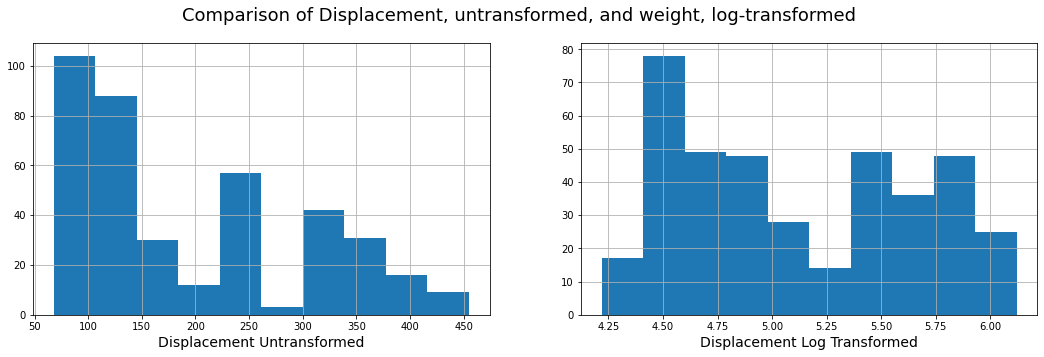

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
auto_mpg['displacement'].hist(ax=axs[0])
np.log(auto_mpg['displacement']).hist(ax=axs[1])
axs[0].set_xlabel('Displacement Untransformed', fontsize=14)
axs[1].set_xlabel('Displacement Log Transformed', fontsize=14)
_ = fig.suptitle('Comparison of Displacement, untransformed, and weight, '
                 'log-transformed', fontsize=18)

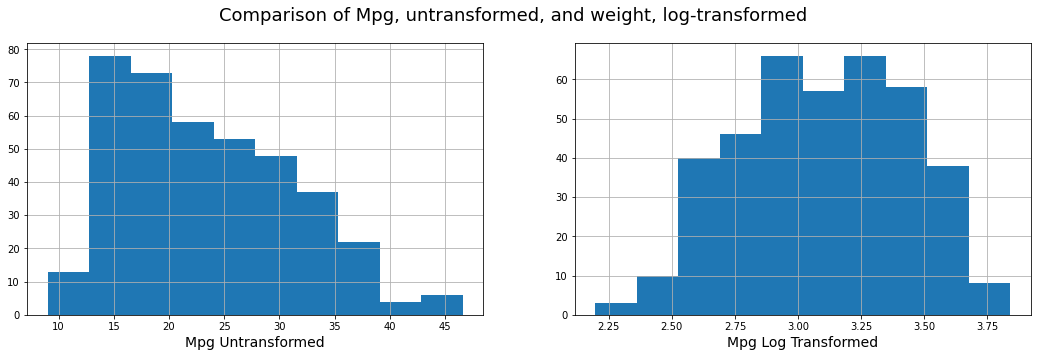

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
auto_mpg['mpg'].hist(ax=axs[0])
np.log(auto_mpg['mpg']).hist(ax=axs[1])
axs[0].set_xlabel('Mpg Untransformed', fontsize=14)
axs[1].set_xlabel('Mpg Log Transformed', fontsize=14)
_ = fig.suptitle('Comparison of Mpg, untransformed, and weight, '
                 'log-transformed', fontsize=18)

In [ ]:
# APPLY the LOG TRANSFORM and REVISUALIZE the DATA

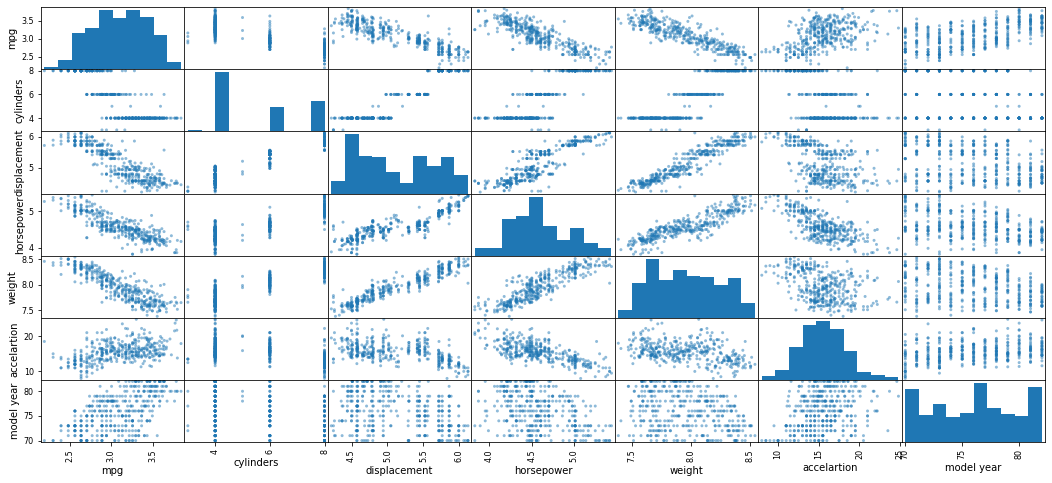

In [46]:
auto_mpg_log = auto_mpg.copy()

for col in ['weight', 'displacement', 'horsepower', 'mpg']: 
    auto_mpg_log[col] = np.log(auto_mpg_log[col])

_ = scatter_matrix(auto_mpg_log, figsize=(18, 8))

In [ ]:
# SPLIT and STANDARDIZE the DATA

In [48]:
auto_train_log, auto_test_log = train_test_split(auto_mpg_log, test_size=0.2,
                                                 random_state=0)

# separate our training data into predictors and predictand
xCols = [col for col in auto_train_log.columns if col not in ['mpg']]
X_train_log = auto_train_log[xCols]
y_train_log = auto_train_log['mpg']

# separate our testing data into predictors and predictand
X_test_log = auto_test_log[xCols]
y_test_log = auto_test_log['mpg']

# STANDARDIZE
X_train_log_std = (X_train_log - X_train_log.mean())/X_train_log.std()
X_test_log_std = (X_test_log - X_train_log.mean())/X_train_log.std()

# STANDARDIZE
y_train_log_std = (y_train_log - y_train_log.mean())/y_train_log.std()
y_test_log_std = (y_test_log - y_train_log.mean())/y_train_log.std()

In [ ]:
# Train the Model on LOG2-Transformed And STANDARDIZED Data

In [49]:
linReg_log = LassoCV(cv=5, n_alphas=100)
linReg_log.fit(X_train_log_std, y_train_log_std)
print('Optimal Alpha: {:.6f}'.format(linReg.alpha_))

Optimal Alpha: 0.007757


In [50]:
## Printing the COEFFICIENTS

for pred, coef in zip(X_train_log.columns, linReg_log.coef_):
    if coef != 0 :
       print('{}: {:.2f}'.format(pred, coef)) 

cylinders: -0.04
displacement: -0.03
horsepower: -0.14
weight: -0.59
model year: 0.31


In [ ]:
# COMPUTE MSE and R^2

In [51]:
y_pred_log_std = linReg_log.predict(X_test_log_std)

# CONVERTING the prediction into unstandardized, un-log transformed space.

y_pred_log = (y_pred_log_std * y_train_log.std()) + y_train_log.mean()
y_pred_unlog = np.exp(y_pred_log)
y_test_unlog = np.exp(y_test_log)


print('The MSE, on the unstandardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test_unlog, y_pred_unlog)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test_unlog, y_pred_unlog))))

The MSE, on the unstandardized predictions, is: 7.450
R^2 Score is: 0.880


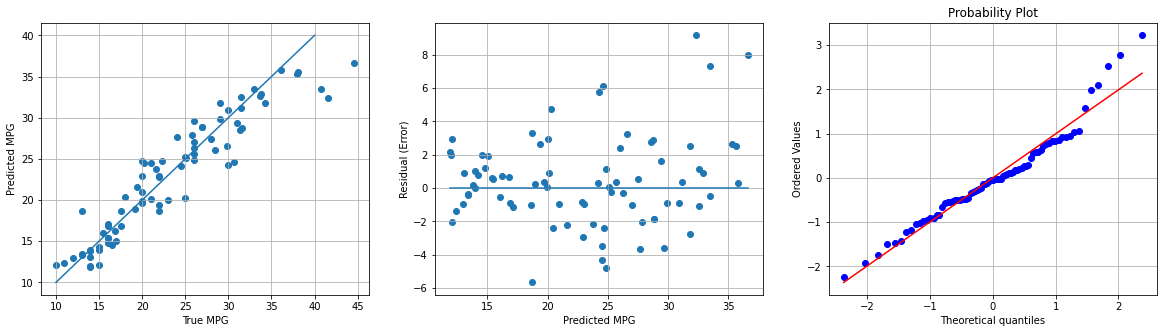

In [52]:
# The first is a scatter plot of actual values vs predicted. 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test_unlog, y_pred_unlog)
axs[0].plot([10, 40], [10, 40])
axs[0].set_xlabel('True MPG')
axs[0].set_ylabel('Predicted MPG')
axs[0].grid()

# The second is a plot of residuals (errors) with respect to predicted value. 
residuals = y_test_unlog - y_pred_unlog
axs[1].scatter(y_pred_unlog, residuals)
axs[1].plot([y_pred_unlog.min(), y_pred_unlog.max()],[0, 0])
axs[1].set_xlabel('Predicted MPG')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

# The third is a Q-Q plot which measures the distribution of the residuals against a normal distribution.
residulas_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residulas_std, dist="norm", plot=axs[2])
axs[2].grid()

In [ ]:
# a DECISION TREE REGRESSOR (a NONLINEAR MODEL)

In [54]:
# Make a decision tree regressor
NN = MLPRegressor(random_state=0)

# Make a a dictionary of the different paramters and their ranges that we would like to test.
parameters = {'alpha': np.arange(0.400, 0.600, 0.025)}

# Make the GridSearchCV object, with the model and the parameters, and specify the number of CV folds. 
gsCV = GridSearchCV(NN, parameters, cv=5, return_train_score=True)

# TRAIN the model that performs the cross-validation loop for every hyper-paramter combination we want to test.
gsCV.fit(X=X_train_log_std, y=y_train_log_std)

/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bogdan/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bogdan/miniconda3/lib/python3.

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=0),
             param_grid={'alpha': array([0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575])},
             return_train_score=True)

In [55]:
# PRINTING the BEST PARAMETERS

print(gsCV.best_params_)
bestNN = gsCV.best_estimator_

{'alpha': 4e-01}


In [ ]:
# COMPUTING MSE and 𝑅2

In [56]:
y_NNpred_log_std = bestNN.predict(X_test_log_std)

y_NNpred_log = (y_NNpred_log_std* y_train_log.std()) + y_train_log.mean()

y_NNpred_unlog = np.exp(y_NNpred_log)


print('The MSE, on the unstandardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test, y_NNpred_unlog)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test, y_NNpred_unlog))))

The MSE, on the unstandardized predictions, is: 6.202
R^2 Score is: 0.900


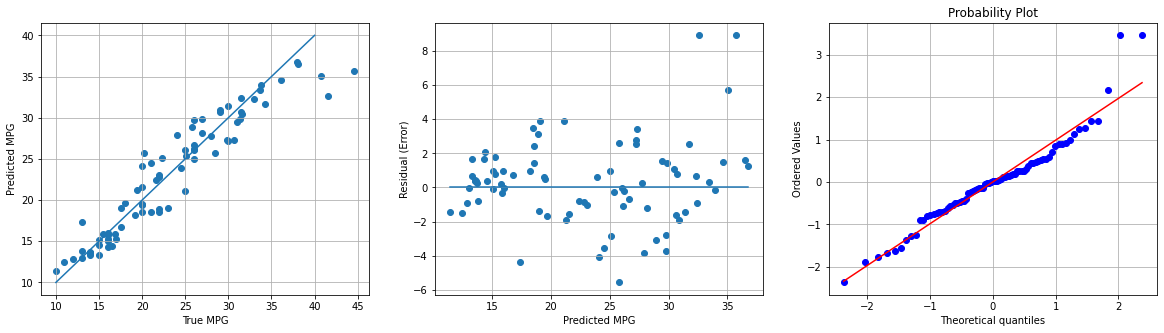

In [57]:
# The first is a scatter plot of actual values vs predicted. 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test, y_NNpred_unlog)
axs[0].plot([10, 40], [10, 40])

axs[0].set_xlabel('True MPG')
axs[0].set_ylabel('Predicted MPG')
axs[0].grid()

# The second is a plot of residuals (errors) with respect to predicted value. 
residuals = y_test - y_NNpred_unlog
axs[1].scatter(y_NNpred_unlog, residuals)
axs[1].plot([y_NNpred_unlog.min(), y_NNpred_unlog.max()],[0, 0])
axs[1].set_xlabel('Predicted MPG')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

# The third is a Q-Q plot which measures the distribution of the residuals against a normal distribution.
residulas_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residulas_std, dist="norm", plot=axs[2])
axs[2].grid()

In [ ]:
linReg.alpha_